最常见的两种线性分类算法是 Logistic 回归 （ logistic regression） 和线性支持向量机
（ linear support vector machine， 线性 SVM） ， 前者在
linear_model.LogisticRegression 中实现， 后者在 svm.LinearSVC （ SVC 代表支持
向量分类器） 中实现。 虽然 LogisticRegression 的名字中含有回归（ regression） ，
但它是一种分类算法， 并不是回归算法， 不应与 LinearRegression 混淆。

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
X, y = mglearn.datasets.make_forge()

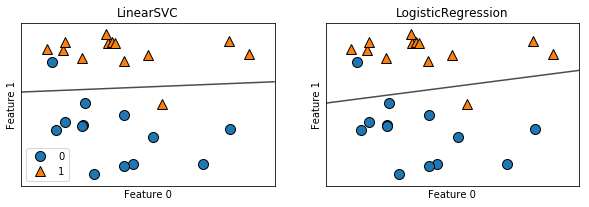

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

对于 LogisticRegression 和 LinearSVC ， 决定正则化强度的权衡参数叫作 C 。 C 值越
大， 对应的正则化越弱 。 换句话说， 如果参数 C 值较大， 那么 LogisticRegression
和 LinearSVC 将尽可能将训练集拟合到最好， 而如果 C 值较小， 那么模型更强调使系
数向量（ w ） 接近于 0。
参数 C 的作用还有另一个有趣之处。 较小的 C 值可以让算法尽量适应“大多数”数据
点， 而较大的 C 值更强调每个数据点都分类正确的重要性。 

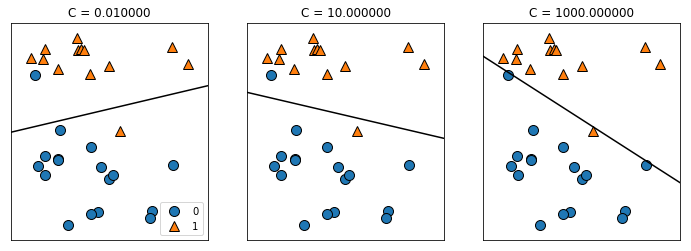

In [5]:
mglearn.plots.plot_linear_svc_regularization()

与回归的情况类似， 用于分类的线性模型在低维空间中看起来可能非常受限， 决策边
界只能是直线或平面。 同样， 在高维空间中， 用于分类的线性模型变得非常强大， 当
考虑更多特征时， 避免过拟合变得越来越重要。
我们在乳腺癌数据集上详细分析 LogisticRegression ：

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target,random_state=42)

In [7]:
logreg = LogisticRegression().fit(X_train, y_train)

In [8]:
logreg.score(X_train, y_train)

0.9530516431924883

In [9]:
logreg.score(X_test, y_test)

0.958041958041958

但由
于训练集和测试集的性能非常接近， 所以模型很可能是欠拟合的。 我们尝试增大 C 来
拟合一个更灵活的模型：

In [10]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

In [11]:
logreg100.score(X_train, y_train)

0.971830985915493

In [12]:
logreg100.score(X_test, y_test)

0.965034965034965

In [13]:
logreg001 = LogisticRegression(C=.001).fit(X_train, y_train)

In [14]:
logreg001.score(X_train, y_train)

0.9225352112676056

In [15]:
logreg001.score(X_test, y_test)

0.9370629370629371

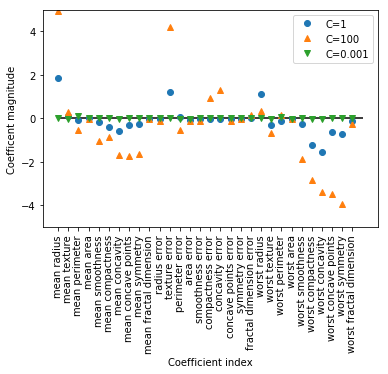

In [16]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficent magnitude")
plt.ylim(-5, 5)
plt.legend()


由于 LogisticRegression 默认应用 L2 正则化， 所以其结果
与图 2-12 中 Ridge 的结果类似。 更强的正则化使得系数更趋向于 0， 但系数永远
不会正好等于 0。 进一步观察图像， 还可以在第 3 个系数那里发现有趣之处， 这
个系数是“平均周长”（ mean perimeter） 。 C=100 和 C=1 时， 这个系数为负， 而
C=0.001 时这个系数为正， 其绝对值比 C=1 时还要大。 在解释这样的模型时， 人
们可能会认为， 系数可以告诉我们某个特征与哪个类别有关。 例如， 人们可能会
认为高“纹理错误”（ texture error） 特征与“恶性”样本有关。 但“平均周长”系数的
正负号发生变化， 说明较大的“平均周长”可以被当作“良性”的指标或“恶性”的指
标， 具体取决于我们考虑的是哪个模型。 这也说明， 对线性模型系数的解释应该
始终持保留态度。

如果想要一个可解释性更强的模型， 使用 L1 正则化可能更好， 因为它约束模型只使
用少数几个特征。 下面是使用 L1 正则化的系数图像和分类精度

Training accuracy of l1 LogisticRegression withC=0.001: 0.9131455399061033
Test accuracy of l1 LogisticRegression withC=0.001: 0.9230769230769231
Training accuracy of l1 LogisticRegression withC=1: 0.960093896713615
Test accuracy of l1 LogisticRegression withC=1: 0.958041958041958
Training accuracy of l1 LogisticRegression withC=100: 0.9859154929577465
Test accuracy of l1 LogisticRegression withC=100: 0.9790209790209791


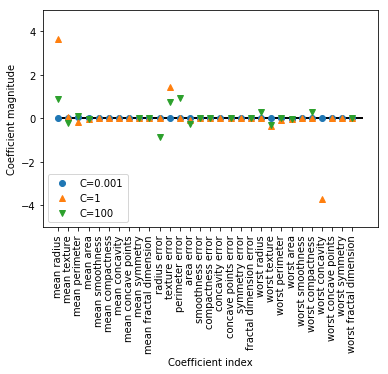

In [17]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty='l1').fit(X_train, y_train)
    print("Training accuracy of l1 LogisticRegression with"
         f"C={C}: {lr_l1.score(X_train, y_train)}")
    print("Test accuracy of l1 LogisticRegression with"
         f"C={C}: {lr_l1.score(X_test, y_test)}")
    plt.plot(lr_l1.coef_.T, marker, label=f"C={C}")
    plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
#     我发现 hlines 实际上就是中间那条基线，参数就是起始位置和长度
    plt.hlines(0, 0, cancer.data.shape[1])
    plt.ylim(-5, 5)
    plt.xlabel("Coefficient index")
    plt.ylabel("Coefficient magnitude")
    plt.legend(loc=3)

In [18]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
X.shape
y.shape
y

array([2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0,
       0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0])

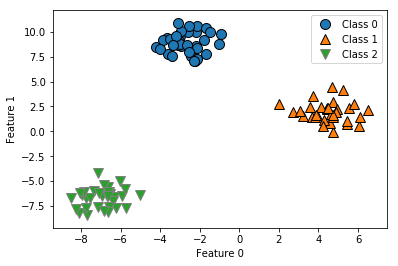

In [19]:
# 我知道 discrete_scatter 的参数什么意思了
# 前两个是 x，y 轴的值，第三个是根据不同分类结果给数据点分配不同的颜色和形状
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

包含 3 个类别的二维玩具数据集
现在， 在这个数据集上训练一个 LinearSVC 分类器：

In [20]:
linear_svm = LinearSVC().fit(X, y)

In [21]:
linear_svm.coef_.shape

(3, 2)

In [22]:
linear_svm.intercept_.shape

(3,)

In [23]:
linear_svm.intercept_

array([-1.07745644,  0.13140585, -0.0860494 ])

In [24]:
linear_svm.coef_

array([[-0.17492597,  0.23140979],
       [ 0.47621848, -0.06937275],
       [-0.18914047, -0.20400354]])

In [25]:
X

array([[-7.72642091, -8.39495682],
       [ 5.45339605,  0.74230537],
       [-2.97867201,  9.55684617],
       [ 6.04267315,  0.57131862],
       [-6.52183983, -6.31932507],
       [ 3.64934251,  1.40687195],
       [-2.17793419,  9.98983126],
       [ 4.42020695,  2.33028226],
       [ 4.73695639,  2.94181467],
       [-3.6601912 ,  9.38998415],
       [-3.05358035,  9.12520872],
       [-6.65216726, -5.57296684],
       [-6.35768563, -6.58312492],
       [-3.6155326 ,  7.8180795 ],
       [-1.77073104,  9.18565441],
       [-7.95051969, -6.39763718],
       [-6.60293639, -6.05292634],
       [-2.58120774, 10.01781903],
       [-7.76348463, -6.72638449],
       [-6.40638957, -6.95293851],
       [-2.97261532,  8.54855637],
       [-6.9567289 , -6.53895762],
       [-7.32614214, -6.0237108 ],
       [-2.14780202, 10.55232269],
       [-2.54502366, 10.57892978],
       [-2.96983639, 10.07140835],
       [ 3.22450809,  1.55252436],
       [-6.25395984, -7.73726715],
       [-7.85430886,

In [26]:
y

array([2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0,
       0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0])

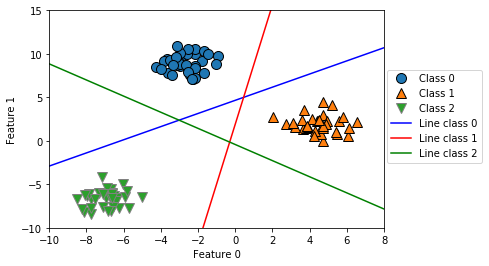

In [27]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))

Text(0,0.5,'Feature 1')

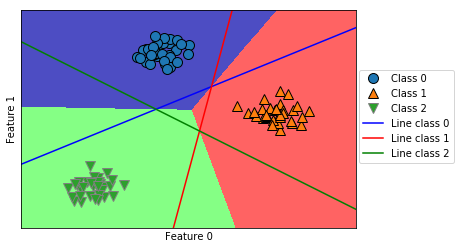

In [38]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                 ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    plt.legend(["Class 0", "Class 1", "Class 2", 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

线性模型的主要参数是正则化参数， 在回归模型中叫作 alpha ， 在 LinearSVC 和
Logistic-Regression 中叫作 C 。 alpha 值较大或 C 值较小， 说明模型比较简单。 特别
是对于回归模型而言， 调节这些参数非常重要。 通常在对数尺度上对 C 和 alpha 进行
搜索。 你还需要确定的是用 L1 正则化还是 L2 正则化。 如果你假定只有几个特征是
真正重要的， 那么你应该用 L1 正则化， 否则应默认使用 L2 正则化。 如果模型的可
解释性很重要的话， 使用 L1 也会有帮助。 由于 L1 只用到几个特征， 所以更容易解
释哪些特征对模型是重要的， 以及这些特征的作用。

如果你假定只有几个特征是
真正重要的， 那么你应该用 L1 正则化， 否则应默认使用 L2 正则化。 如果模型的可
解释性很重要的话， 使用 L1 也会有帮助。 由于 L1 只用到几个特征， 所以更容易解
释哪些特征对模型是重要的， 以及这些特征的作用。

线性模型的训练速度非常快， 预测速度也很快。 这种模型可以推广到非常大的数据
集， 对稀疏数据也很有效。 如果你的数据包含数十万甚至上百万个样本， 你可能需要
研究如何使用 LogisticRegression 和 Ridge 模型的 solver='sag' 选项， 在处理大型
数据时， 这一选项比默认值要更快。 其他选项还有 SGDClassifier 类和 SGDRegressor
类， 它们对本节介绍的线性模型实现了可扩展性更强的版本。